Loss functions help gauge how a machine learning model is performing with its given data, and how well it’s able to predict an expected outcome. Many machine learning algorithms use loss functions in the optimization process during training to evaluate and improve its output accuracy. Also, by minimizing a chosen loss function during optimization, this can help determine the best model parameters needed for given data.

- #### **Mean Squared Error / Quadratic Loss / L2 Loss**
We define the mean squared error (MSE) loss function, or L2 loss, as the average of squared differences between the actual value (Y) and the predicted value (Ŷ). It’s the most commonly used **regression loss function.**

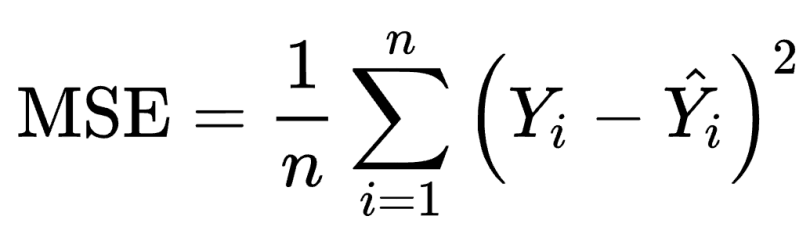

- #### **Mean Absolute Error / L1 Loss**
We define the mean absolute error (MAE) loss function, or L1 loss, as the average of absolute differences between the actual and the predicted value. It’s the second most commonly used **regression loss function.** It measures the average magnitude of errors in a set of predictions, without considering their directions.

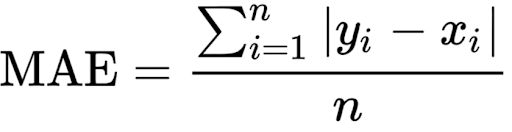

- #### **Cross-Entropy Loss / Log Loss**
This is the most common loss function used in **classification problems.** The cross-entropy loss decreases as the predicted probability converges to the actual label. It measures the performance of a classification model whose predicted output is a probability value between 0 and 1.

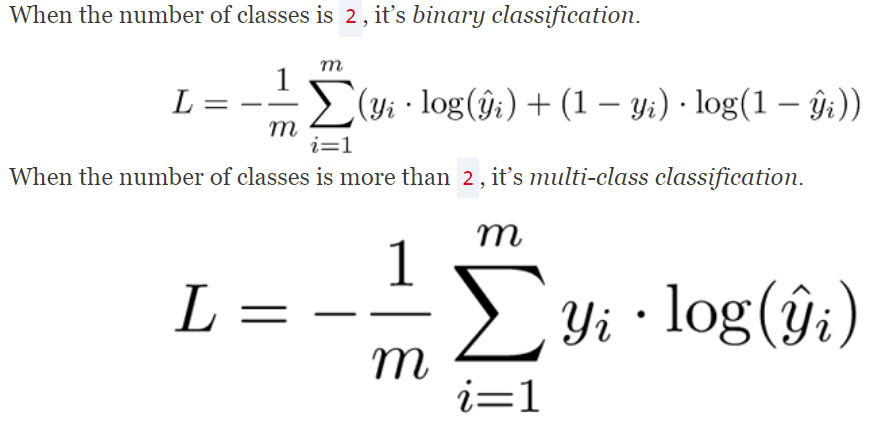



In [8]:
from __future__ import division
import numpy as np

import nbimporter
from activation_functions import Sigmoid
from accuracy import accuracy_score


class Loss(object):
    def loss(self, y_true, y_pred):
        return NotImplementedError()
    def gradient(self, y, y_pred):
        raise NotImplementedError()
    def acc(self, y, y_pred):
        return 0

class SquareLoss(Loss):
    def __init__(self): pass
    def loss(self, y, y_pred):
        return 0.5 * np.power((y - y_pred), 2)
    def gradient(self, y, y_pred):
        return -(y - y_pred)
    
class MeanAbsoluteError(Loss):
    def __init__(self): pass
    def loss(self, y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))
    def gradient(self, y_true, y_pred):
        return np.where(y_pred > y_true, 1, -1)
    def acc(self, y_true, y_pred):
        return -1  


class CrossEntropy(Loss):
    def __init__(self): pass
    def loss(self, y, p):
        # Avoid division by zero
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - y * np.log(p) - (1 - y) * np.log(1 - p)
    def gradient(self, y, p):
        # Avoid division by zero
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return - (y / p) + (1 - y) / (1 - p)
    def acc(self, y, p):
        return accuracy_score(np.argmax(y, axis=1), np.argmax(p, axis=1))

